# Plant Disease Classification - Exploratory Data Analysis

This notebook explores the data analysis for [plant disease classification merged dataset](https://www.kaggle.com/datasets/alinedobrovsky/plant-disease-classification-merged-dataset/data). 

## Importing libraries needed

First, we import all  the necessary libraries for data analysis as seen below:

In [1]:
# Importing the required libraries
import matplotlib.pyplot as plt # for data visualization and plotting
import numpy as np # for high-level mathematical functions
import pandas as pd # for data processing
import seaborn as sns #for statistical data visualization


from colorama import Fore, Style # for colored terminal text and formatting for output 

from fastcore.all import * # for machine learning/deep learning processes

In [2]:
#importing supplementary libraries
import warnings
warnings.filterwarnings('ignore')

### Setting the Data path

We then set up the path object from our downloaded dataset directory as seen below:

In [3]:
# Printing the current working directory
import os
print(os.getcwd())

/home/roach/Maureen/Plant Disease


In [4]:
# assigning the path to a directory where data is stored to a variable data_dir.
data_dir = '/home/roach/Maureen/Plant Disease/data'

In [5]:
# creating a Path object using fastcore library
path = Path(data_dir)

### Data Analysis

This section explores the analysis of the plant disease classidication dataset.

In [6]:
# Initializing a counter variable to keep track of the number of classes.
cnt = 0

# Initializing an empty list to store the names of the plant classes.
plant_names = []

# Initializing a variable to keep track of the total number of images.
tot_images = 0

# Using a list comprehension to get the names of all items in the specified path and storing them in the contents list.
contents = [p.name for p in path.ls()]

# Printing the output in green text using Colorama.
print(Fore.GREEN)

# Printing the total number of classes by calculating the length of the contents list.
print("Total number of classes are: ", len(contents))

# Looping through each item in the contents list.
for i in contents:
    # Incrementing the class counter by 1.
    cnt += 1

    # Appending the current class name to the plant_names list.
    plant_names.append(i)

    # Listing all files in the directory corresponding to the current class and storing the file names in the image_path list.
    image_path = os.listdir(data_dir + "/" + i)

    # Printing the number of images in the current class.
    print("\nThe Number of Images in " + i + ":", len(image_path), end=" ")

    # Adding the number of images in the current class to the total image counter.
    tot_images += len(image_path)

# Printing the total number of images across all classes.
print("\nTotal Number of Images in Directory: ", tot_images)



Total number of classes are:  88

The Number of Images in Chili__whitefly: 100 
The Number of Images in Corn__common_rust: 1308 
The Number of Images in Grape__black_rot: 11390 
The Number of Images in Tea__red_leaf_spot: 429 
The Number of Images in Soybean__southern_blight: 62 
The Number of Images in Potato__late_blight: 1093 
The Number of Images in Tomato__spider_mites_(two_spotted_spider_mite): 1676 
The Number of Images in Lemon__diseased: 77 
The Number of Images in Jamun__diseased: 345 
The Number of Images in Apple__healthy: 1649 
The Number of Images in Pepper_bell__healthy: 1539 
The Number of Images in Chili__yellowish: 100 
The Number of Images in Cassava__healthy: 677 
The Number of Images in Apple__rust: 357 
The Number of Images in Corn__northern_leaf_blight: 1223 
The Number of Images in Rice__leaf_blast: 981 
The Number of Images in Soybean__diabrotica_speciosa: 2205 
The Number of Images in Rice__neck_blast: 1000 
The Number of Images in Gauva__healthy: 277 
The Nu

From the analysis above:
- There are 88 classes of plant disease and healthy plant images.  
- There are 79087 different images.

We can now create a dataframe from the dataset:

In [7]:
# Get a list of all directories in the specified path
cls_name = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Initialize an empty list to store dictionaries
data = []

# Loop through each class directory
for cls in cls_name:
    # Extract the class name from the directory name
    cls_split = cls.split('__')
    
    # Add class, disease, and image count information to the list
    data.append({'Plant': cls_split[0], 
                 'Disease': cls_split[1], 
                 'Count': len(os.listdir(os.path.join(data_dir, cls)))})

# Create a DataFrame from the list of dictionaries
cls_df = pd.DataFrame(data)

Displaying the first 44 rows:

In [8]:
# Display the DataFrame
cls_df.head(44)

,Plant,Disease,Count
0,Chili,whitefly,100
1,Corn,common_rust,1308
2,Grape,black_rot,11390
3,Tea,red_leaf_spot,429
4,Soybean,southern_blight,62
5,Potato,late_blight,1093
6,Tomato,spider_mites_(two_spotted_spider_mite),1676
7,Lemon,diseased,77
8,Jamun,diseased,345
9,Apple,healthy,1649


Displaying the last 44 rows:

In [9]:
cls_df.tail(44)

,Plant,Disease,Count
44,Soybean,mosaic_virus,22
45,Grape,black_measles,1383
46,Jamun,healthy,279
47,Soybean,bacterial_blight,56
48,Rice,healthy,1488
49,Tomato,leaf_mold,957
50,Potato,early_blight,1096
51,Mango,diseased,265
52,Cassava,green_mottle,471
53,Tea,algal_leaf,339


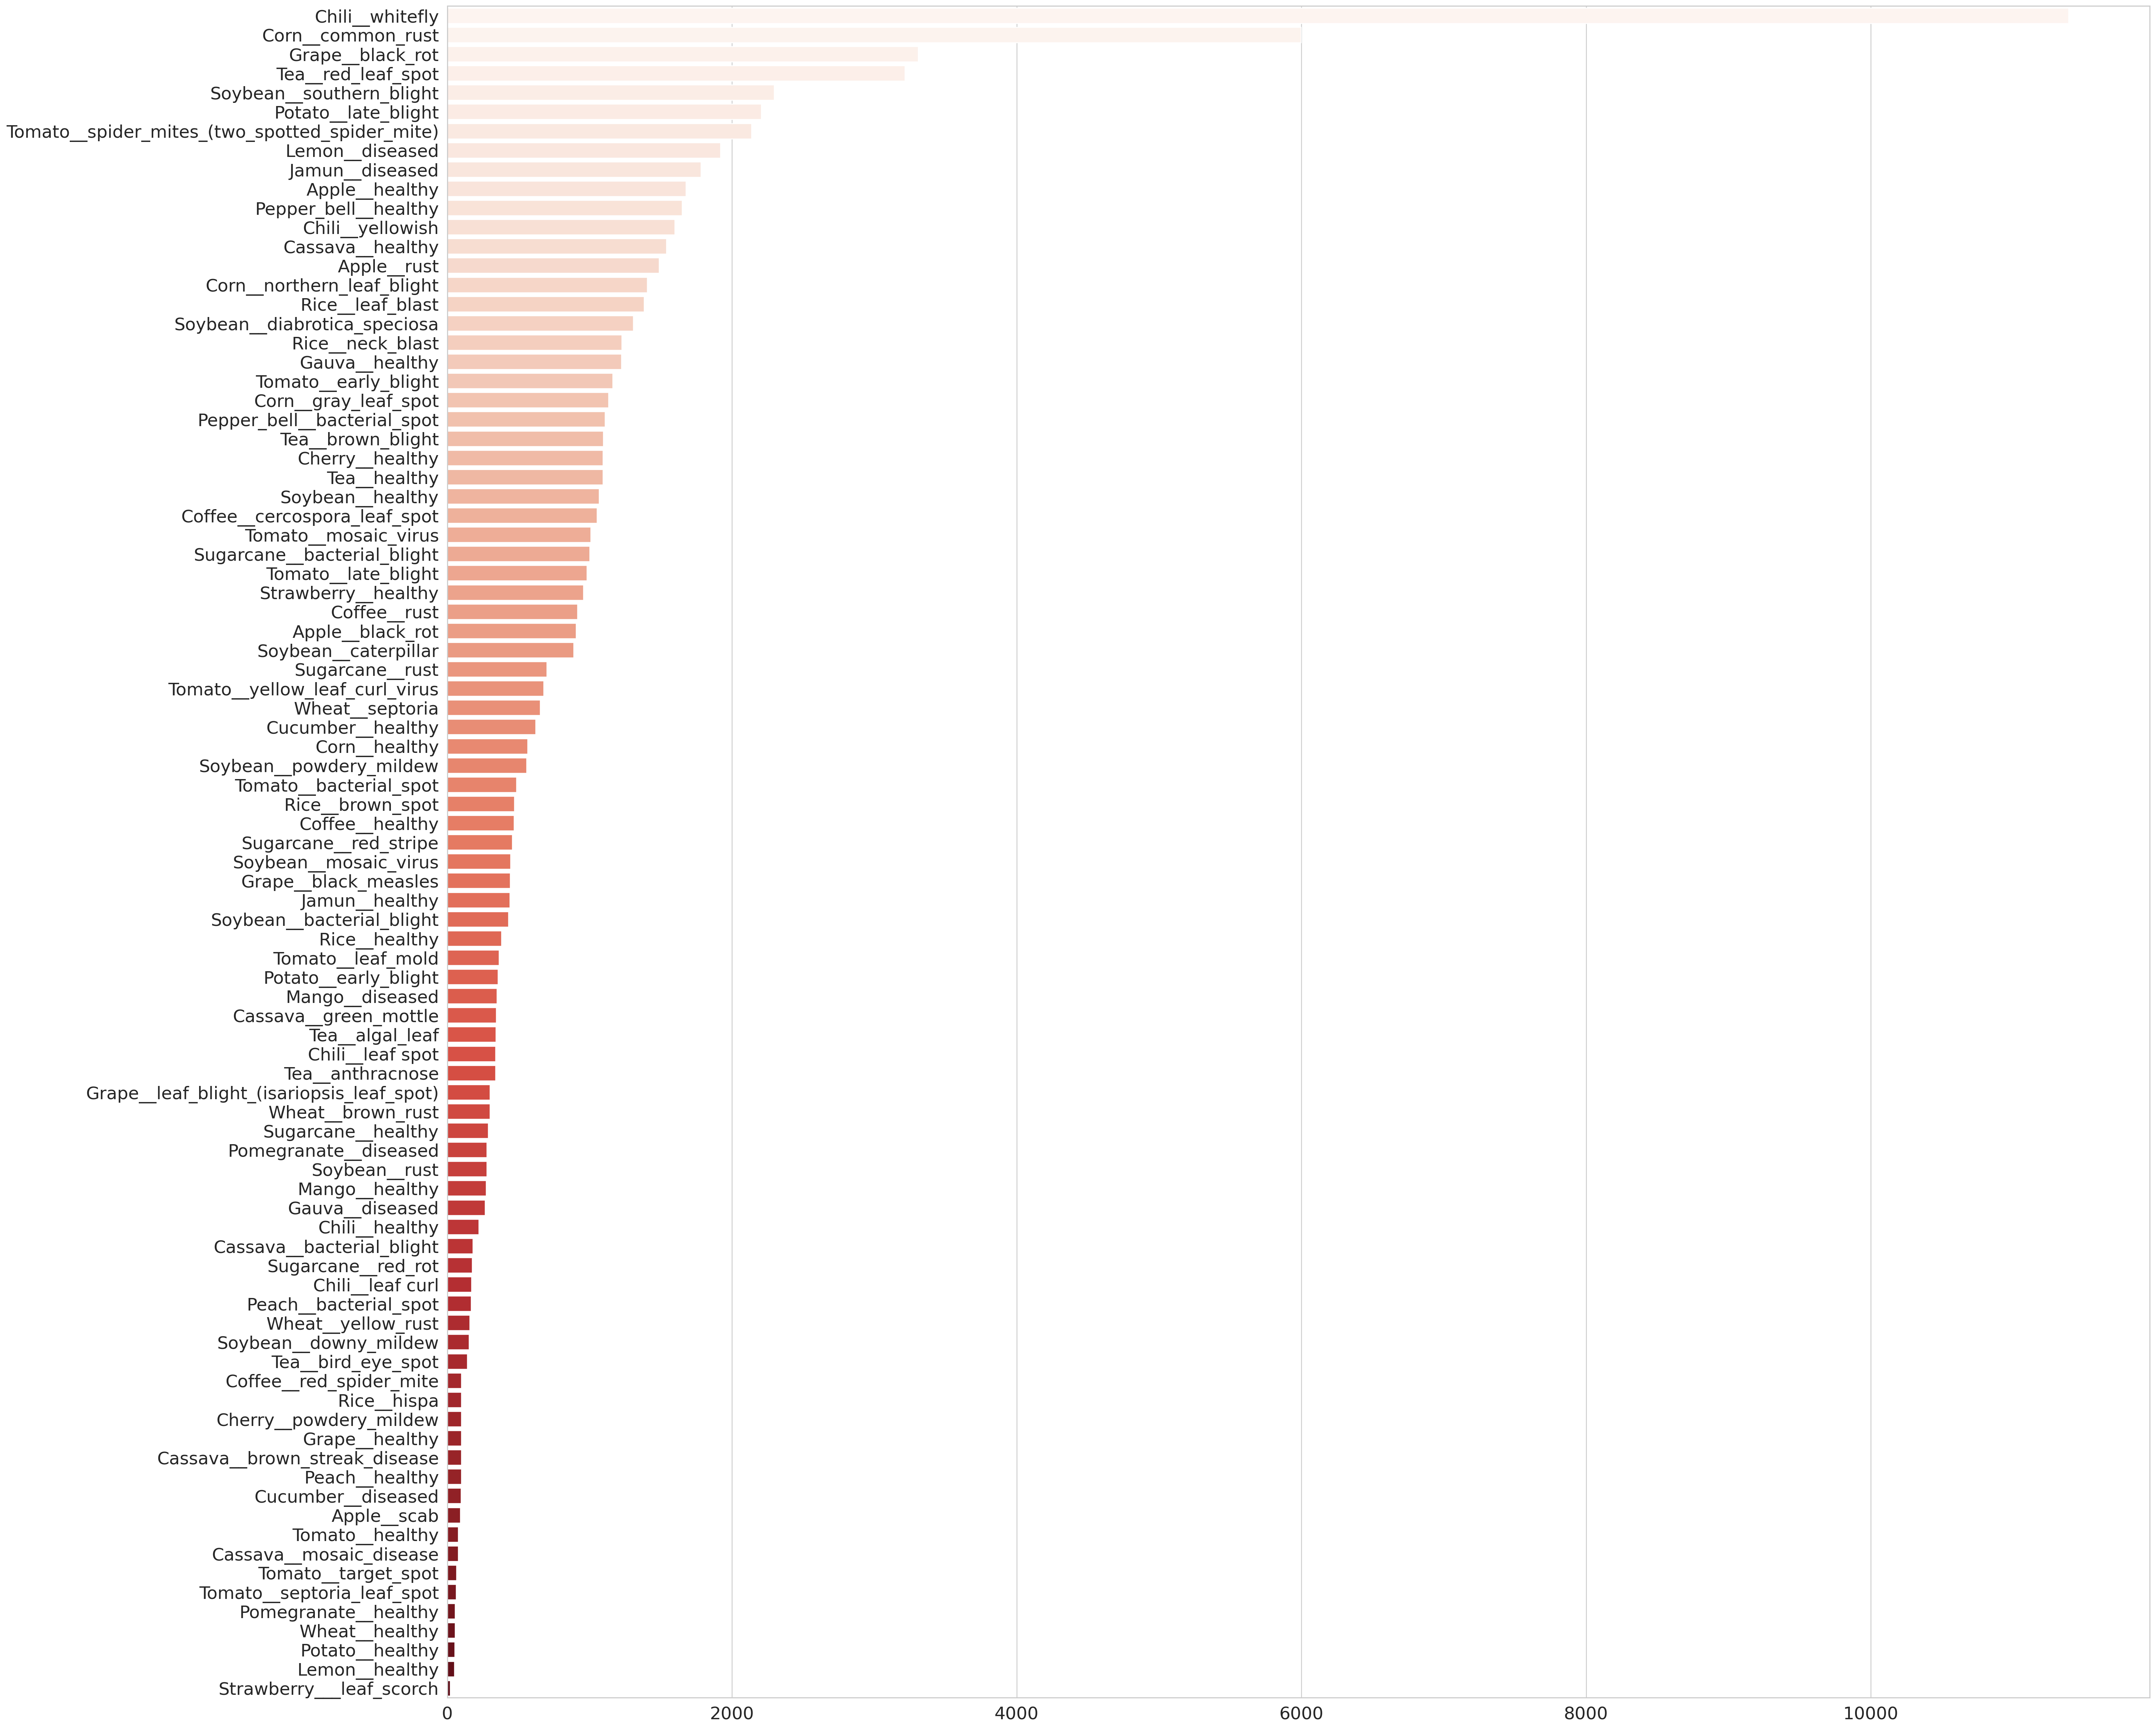

In [10]:
# Initializing an empty list to store the names of the plant classes.
plant_names = []

# Initializing an empty list to store the number of images in each class.
Len = []

# Looping through each item in the contents list.
for i in contents:
    # Appending the current class name to the plant_names list.
    plant_names.append(i)

    # Listing all files in the directory corresponding to the current class and storing the file names in the imgs_path list.
    imgs_path = os.listdir(data_dir + "/" + i)

    # Appending the number of images in the current class to the Len list.
    Len.append(len(imgs_path))

# Sorting the Len list in descending order to display classes with the most images first.
Len.sort(reverse=True)

# Setting the style and color codes for the Seaborn plot.
sns.set(style="whitegrid", color_codes=True)

# Creating a new figure for the plot with a specific size and resolution.
plt.figure(figsize=(35, 35), dpi=180)

# Creating a bar plot with the number of images (Len) on the x-axis and the plant names on the y-axis using the "Reds" color palette.
ax = sns.barplot(x=Len, y=plant_names, palette="Reds")

# Setting the font size of the x-axis tick labels.
plt.xticks(fontsize=20)

# Setting the font size of the y-axis tick labels.
plt.yticks(fontsize=20)

# Displaying the plot.
plt.show()

The graph above shows classes with the highest number of images to the classes with the least number of images.

In [11]:
# Displaying a dataFrame containing only the rows corresponding to the 'Apple' plant
cls_df[cls_df['Plant'] == 'Apple']

,Plant,Disease,Count
9,Apple,healthy,1649
13,Apple,rust,357
32,Apple,black_rot,621
78,Apple,scab,700


The code above shows the total number of images within specific plant class, in this case, Apple.  
We can now try display the total number of images for different plant classes:

In [12]:
cls_df = cls_df.groupby('Plant').apply(lambda x: x.sort_values('Count', ascending=False)).reset_index(drop=True)

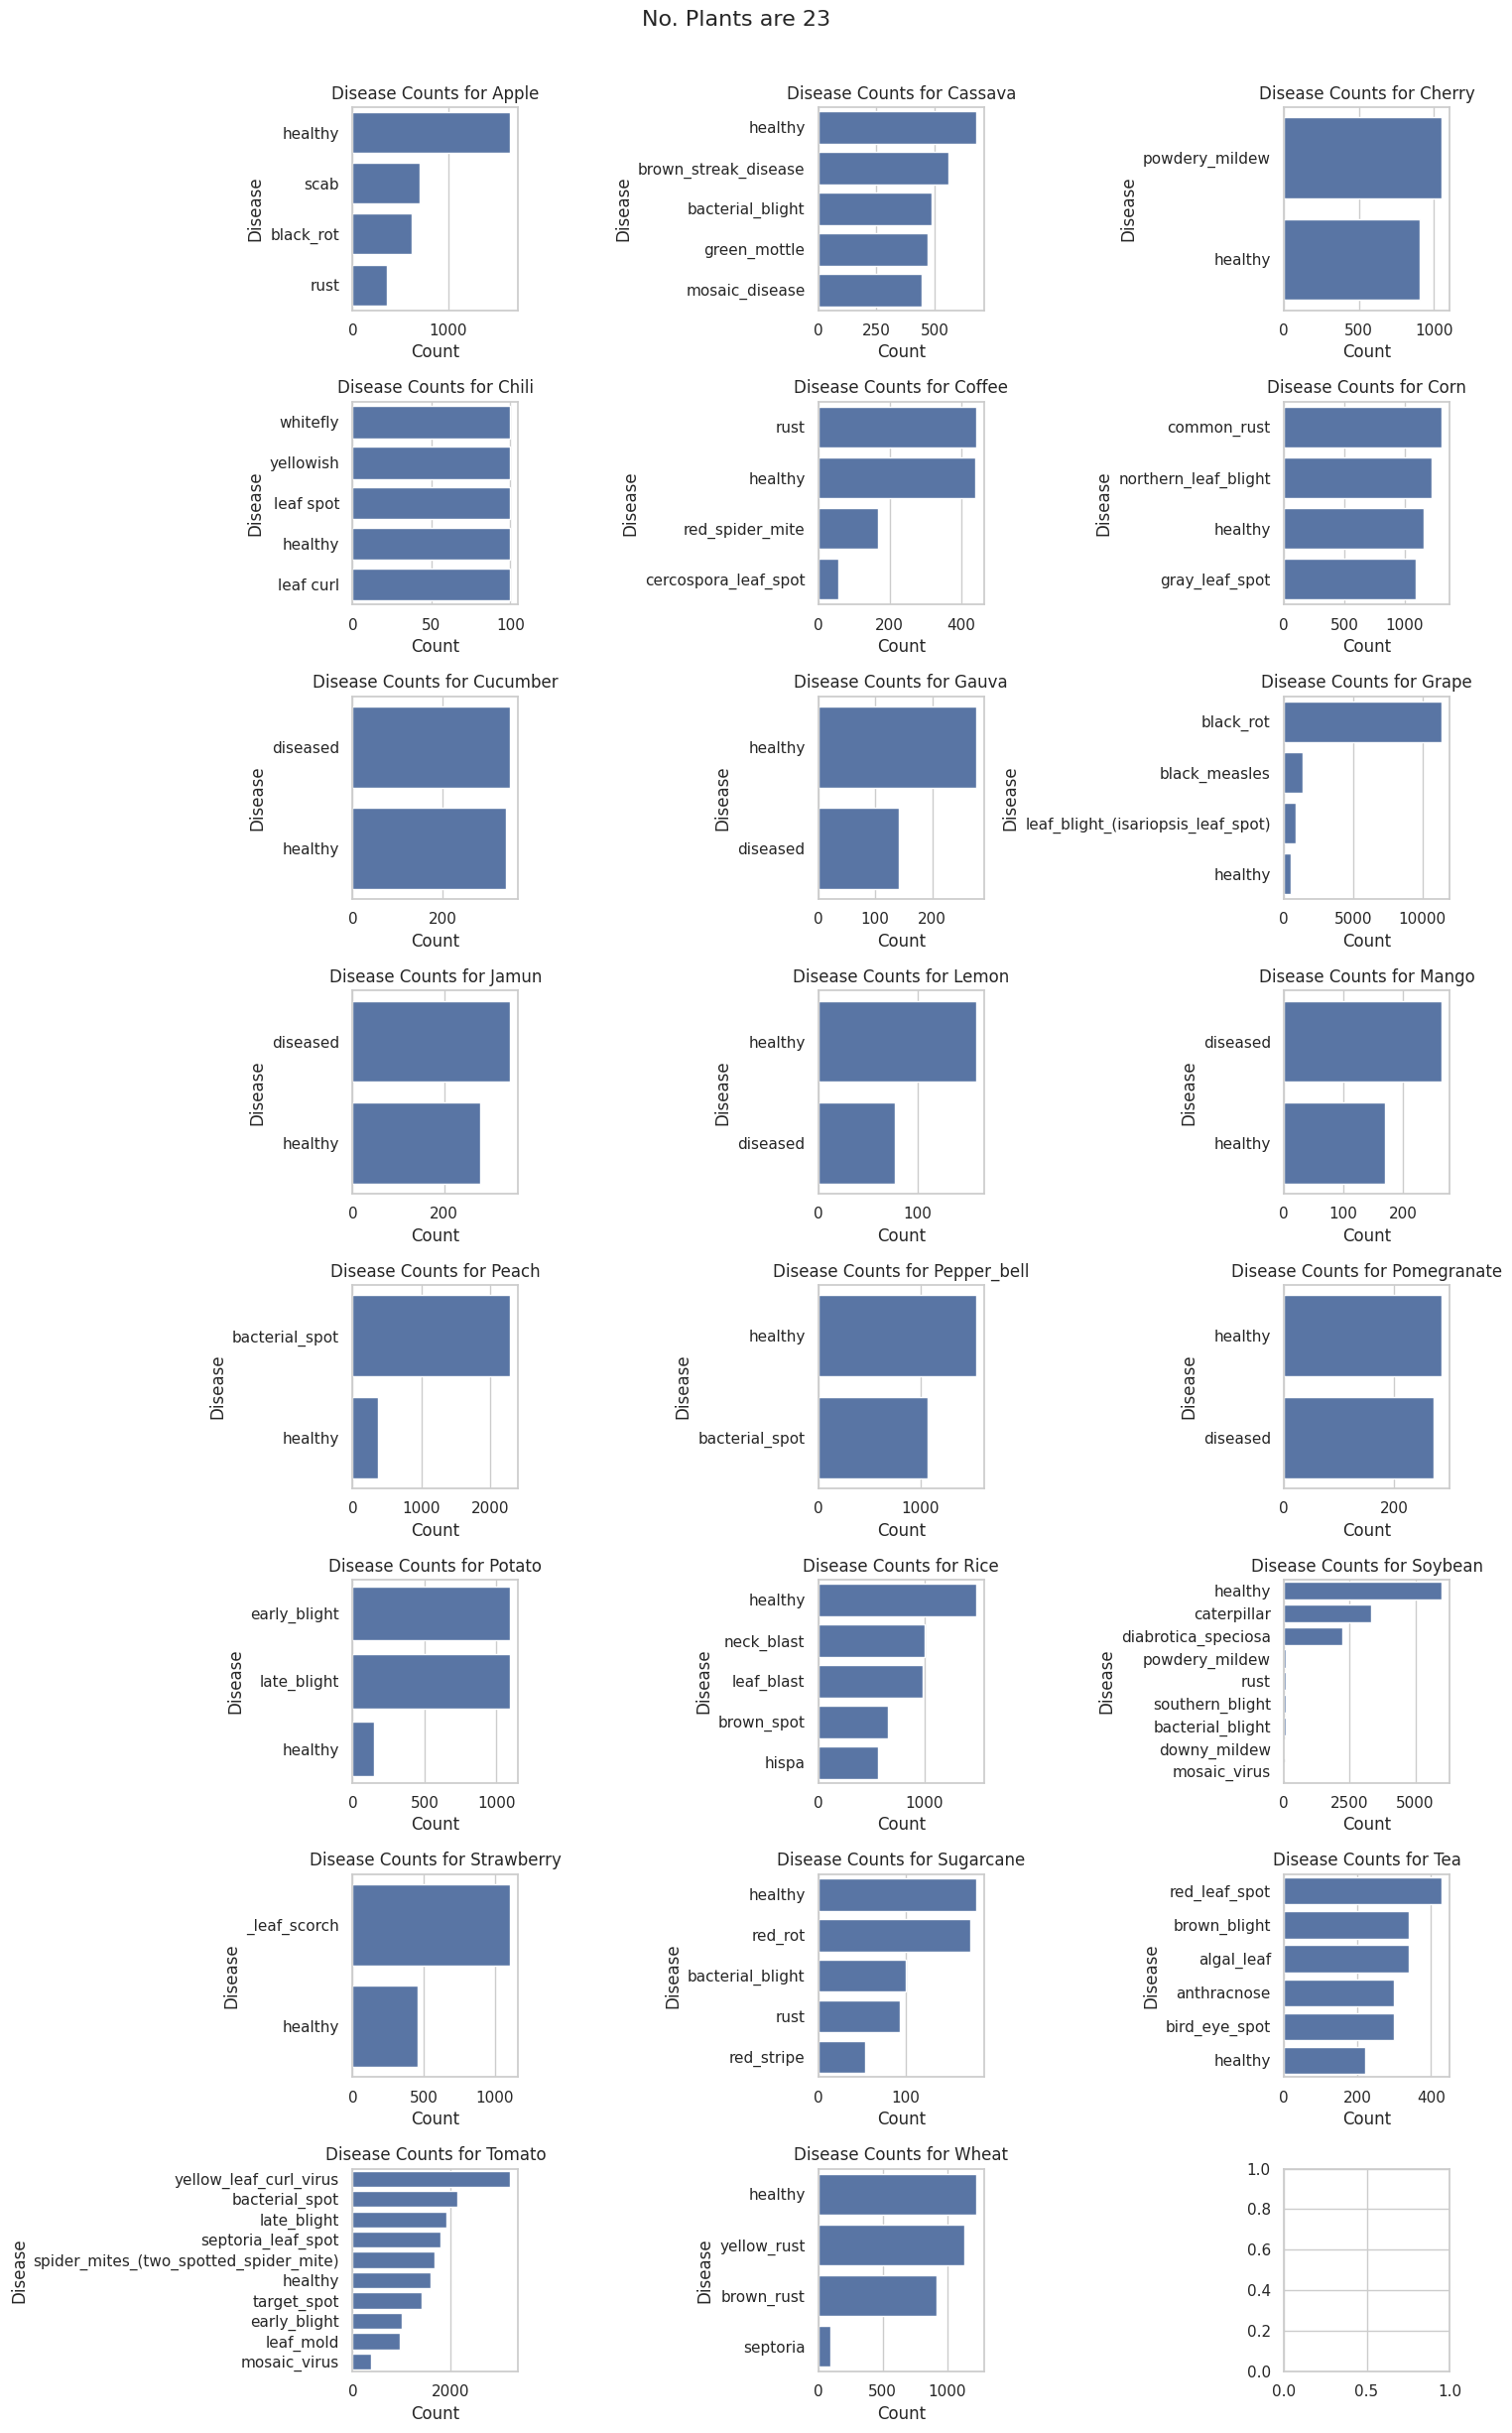

In [13]:
# Create a grid of subplots based on the number of unique plants.
fig, axes = plt.subplots(nrows=(len(set(cls_df['Plant'])) // 3) + 1, ncols=3, figsize=(15, 25))

# Set the main title for the figure.
fig.suptitle('No. Plants are ' + str(len(set(cls_df['Plant']))) + '\n\n\n', fontsize=16)

# Plot disease counts for each plant.
for (plant, data), ax in zip(cls_df.groupby('Plant'), axes.flatten()):
    sns.barplot(x='Count', y='Disease', data=data, ax=ax)
    ax.set_title(f'Disease Counts for {plant}')
    ax.set_xlabel('Count')

# Hide any remaining empty subplots.
for ax in axes.flatten()[len(cls_df['Plant']):]:
    ax.axis('off')

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()